# Task
make a data anylst project using numpy , pandas , matplotlib

Here is all the data you need:
"Mobiles Dataset (2025).csv"

## Data loading

### Subtask:
Load the "Mobiles Dataset (2025).csv" file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first five rows to verify.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('Mobiles Dataset (2025).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Mobiles Dataset (2025).csv' not found. Please ensure the file exists in the current directory.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    df = None

An error occurred while loading the data: 'utf-8' codec can't decode byte 0xa5 in position 139946: invalid start byte


**Reasoning**:
The previous attempt failed due to a decoding error.  I will try again, specifying the encoding as 'latin-1', which often works for files with encoding issues.



In [3]:
import pandas as pd

try:
    df = pd.read_csv('Mobiles Dataset (2025).csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Mobiles Dataset (2025).csv' not found. Please ensure the file exists in the current directory.")
    df = None
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    df = None

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including data types, missing values, and summary statistics of numerical features. Identify potential outliers. Determine the shape of the data.


**Reasoning**:
I need to explore the dataset's structure, including data types, missing values, summary statistics, and potential outliers.  I'll also determine the shape of the data and analyze unique values in categorical features in a single code block.



In [4]:
# 1. Data Shape
print("Shape of the DataFrame:")
print(df.shape)

# 2. Data Types
print("\nData Types of each column:")
print(df.dtypes)

# 3. Missing Values
print("\nMissing Values per column:")
print(df.isnull().sum())

print("\nPercentage of Missing Values per column:")
print(df.isnull().sum() / len(df) * 100)

# 4. Summary Statistics (Numerical Features)
print("\nSummary Statistics for Numerical Features:")
numerical_features = df.select_dtypes(include=['number'])
print(numerical_features.describe())

# 5. Detecting Outliers (Numerical Features)
print("\nPotential Outliers:")

# Loop through each numerical column
for col in numerical_features.columns:
    # Calculate Quartiles and Interquartile Range (IQR)
    Q1 = numerical_features[col].quantile(0.25)  # 25th percentile
    Q3 = numerical_features[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Middle 50% range

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are outliers
    if numerical_features[col].min() < lower_bound or numerical_features[col].max() > upper_bound:
        # Print outlier information
        print(f"- {col}: Min = {numerical_features[col].min()}, Max = {numerical_features[col].max()}")

# 6. Unique Values (Categorical Features)
print("\nUnique Values for Categorical Features:")
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"- {col}: {df[col].nunique()} unique values")

Shape of the DataFrame:
(930, 15)

Data Types of each column:
Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

Missing Values per column:
Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price 

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies in numerical columns and removing duplicate rows.


**Reasoning**:
Clean the numerical columns by removing non-numeric characters and converting them to numeric types. Then, remove duplicate rows.



In [5]:
import re

# Columns to clean
numerical_cols = ['Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size',
                  'Launched Price (Pakistan)', 'Launched Price (India)',
                  'Launched Price (China)', 'Launched Price (USA)',
                  'Launched Price (Dubai)']

# Clean non-numeric characters using vectorized operations
for col in numerical_cols:
    # Remove non-numeric characters
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    # Convert cleaned values to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
display(df.head())
print(df.info())

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12MP,48MP,A17 Bionic,3600,6.1,224999.0,79999,5799,799.0,2799,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12MP,48MP,A17 Bionic,3600,6.1,234999.0,84999,6099,849.0,2999,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12MP,48MP,A17 Bionic,3600,6.1,244999.0,89999,6499,899.0,3199,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12MP,48MP,A17 Bionic,4200,6.7,249999.0,89999,6199,899.0,3199,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12MP,48MP,A17 Bionic,4200,6.7,259999.0,94999,6499,949.0,3399,2024


<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               915 non-null    object 
 1   Model Name                 915 non-null    object 
 2   Mobile Weight              915 non-null    float64
 3   RAM                        915 non-null    float64
 4   Front Camera               915 non-null    object 
 5   Back Camera                915 non-null    object 
 6   Processor                  915 non-null    object 
 7   Battery Capacity           915 non-null    int64  
 8   Screen Size                911 non-null    float64
 9   Launched Price (Pakistan)  914 non-null    float64
 10  Launched Price (India)     915 non-null    int64  
 11  Launched Price (China)     915 non-null    int64  
 12  Launched Price (USA)       915 non-null    float64
 13  Launched Price (Dubai)     915 non-null    int64  
 14 

## Data wrangling

### Subtask:
Convert relevant columns to appropriate data types and create new features.


**Reasoning**:
Convert relevant columns to appropriate data types, create new features, handle missing values, and verify data types.



In [6]:
import pandas as pd
import numpy as np

# Example dataset (replace with your actual DataFrame loading code)
# df = pd.read_csv('your_data_file.csv')

# List of columns
numerical_cols = ['Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size']
price_cols = ['Launched Price (Pakistan)', 'Launched Price (India)', 
              'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
camera_cols = ['Front Camera', 'Back Camera']

# Clean numeric values using pandas string methods
for col in numerical_cols + price_cols:
    df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Clean and extract numerical values from camera specifications
for col in camera_cols:
    df[col] = df[col].astype(str).str.extract('(\\d+)')  # Escape the backslash
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Handle missing values by replacing them with the column mean
columns_to_fill = numerical_cols + price_cols + camera_cols
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())  # Replace NaN with the mean of the column

# Verify cleaned data
print("\nFirst few rows of cleaned data:")
print(df.head())


First few rows of cleaned data:
  Company Name            Model Name  Mobile Weight  RAM  Front Camera  \
0        Apple       iPhone 16 128GB          174.0  6.0            12   
1        Apple       iPhone 16 256GB          174.0  6.0            12   
2        Apple       iPhone 16 512GB          174.0  6.0            12   
3        Apple  iPhone 16 Plus 128GB          203.0  6.0            12   
4        Apple  iPhone 16 Plus 256GB          203.0  6.0            12   

   Back Camera   Processor  Battery Capacity  Screen Size  \
0           48  A17 Bionic              3600          6.1   
1           48  A17 Bionic              3600          6.1   
2           48  A17 Bionic              3600          6.1   
3           48  A17 Bionic              4200          6.7   
4           48  A17 Bionic              4200          6.7   

   Launched Price (Pakistan)  Launched Price (India)  Launched Price (China)  \
0                   224999.0                   79999                    579

## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the cleaned and wrangled dataset.


**Reasoning**:
Calculate descriptive statistics, correlation matrix, and analyze relationships between price and other features. Visualize the distributions of key variables and detect outliers.



Descriptive Statistics:
        Mobile Weight         RAM  Battery Capacity  Screen Size  \
count     915.000000  915.000000        915.000000   915.000000   
mean      228.914098    9.546448       5030.280874     7.094182   
std       106.164933   37.713568       1365.571834     1.544400   
min       135.000000    1.000000       2000.000000     5.000000   
25%       185.000000    6.000000       4400.000000     6.500000   
50%       195.000000    8.000000       5000.000000     6.670000   
75%       209.000000    8.000000       5100.000000     6.780000   
max       732.000000  812.000000      11200.000000    14.600000   

       Launched Price (USA)  
count            915.000000  
mean             631.699082  
std             1357.673441  
min               79.000000  
25%              269.000000  
50%              449.000000  
75%              863.000000  
max            39622.000000  


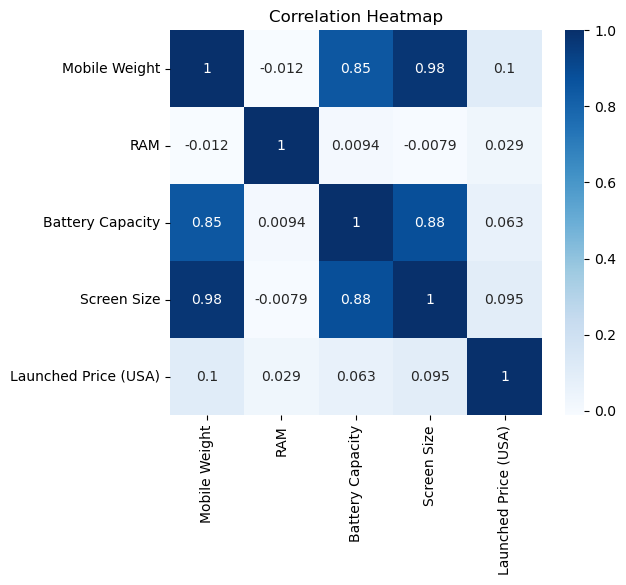

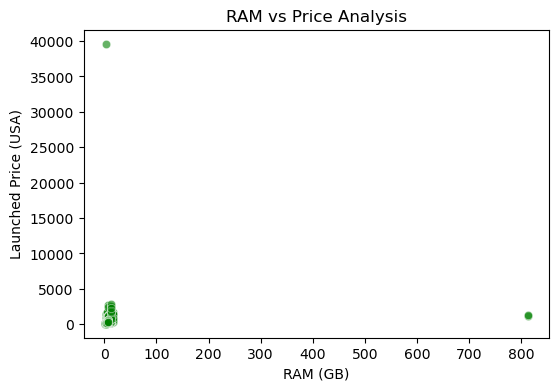

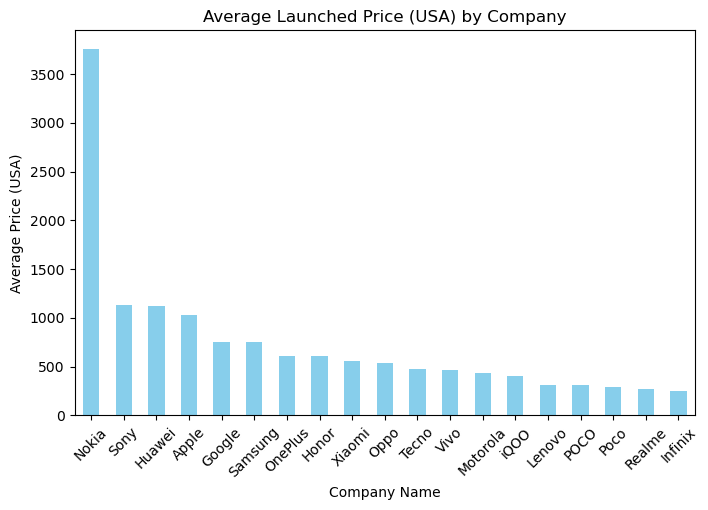

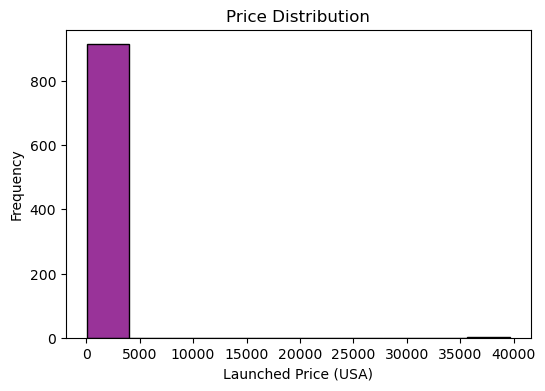

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
# Purpose: Summarize statistics for numerical features.
numerical_features = ['Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size', 'Launched Price (USA)']
print("Descriptive Statistics:\n", df[numerical_features].describe())

# 2. Correlation Heatmap (Simple Version)
# Purpose: Show relationships between numerical features.
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# 3. Scatterplot: RAM vs Price
# Purpose: Analyze the relationship between RAM and price with outlier detection.
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['RAM'], y=df['Launched Price (USA)'], alpha=0.6, color='green')
plt.xlabel('RAM (GB)')
plt.ylabel('Launched Price (USA)')
plt.title('RAM vs Price Analysis')
plt.show()

# 4. Box Plot: Price Distribution by Company
# Purpose: Compare price ranges across companies, highlighting variation and outliers.
plt.figure(figsize=(8, 5))
avg_prices = df.groupby('Company Name')['Launched Price (USA)'].mean()
avg_prices.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Launched Price (USA) by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price (USA)')
plt.xticks(rotation=45)
plt.show()

# 5. Histogram: Price Distribution
# Purpose: Show the frequency distribution of prices for trend detection.
plt.figure(figsize=(6, 4))
sns.histplot(df['Launched Price (USA)'], bins=10, kde=False, color='purple', alpha=0.8)
plt.xlabel('Launched Price (USA)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create the visualizations specified in the instructions using matplotlib and seaborn.



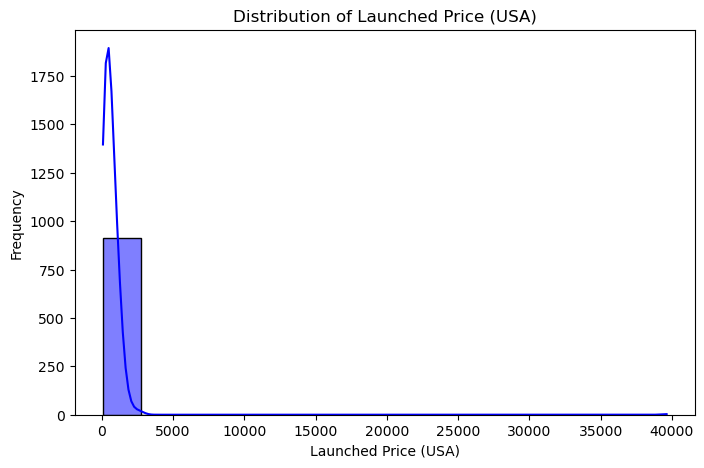

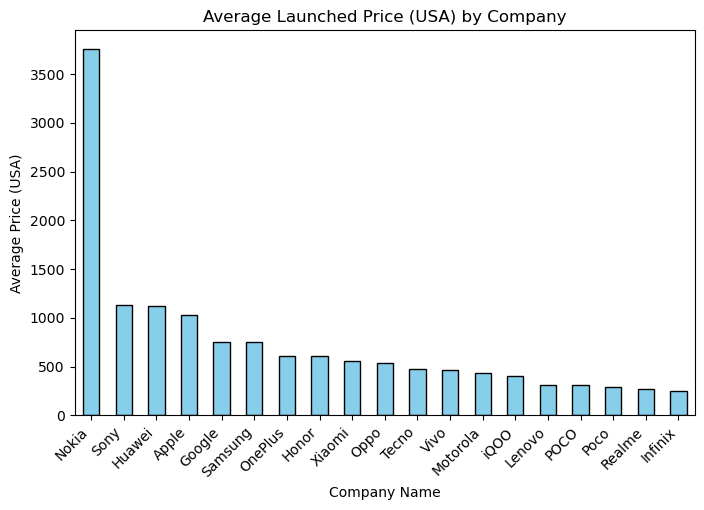

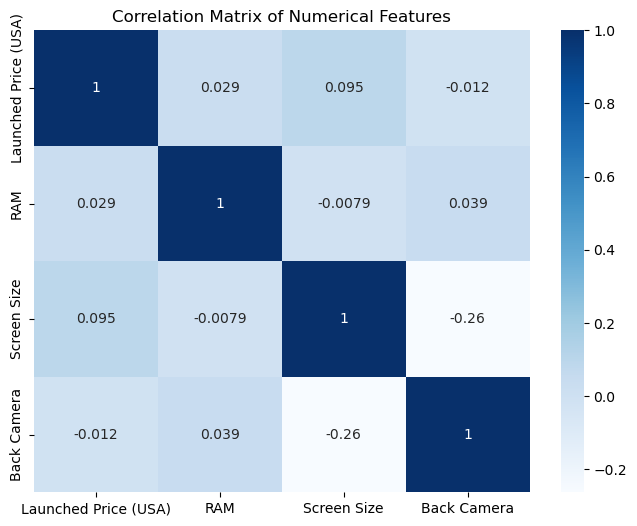

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram with KDE (Distribution Analysis)
plt.figure(figsize=(8, 5))
sns.histplot(df['Launched Price (USA)'], kde=True, color='blue', bins=15)
plt.title('Distribution of Launched Price (USA)')
plt.xlabel('Launched Price (USA)')
plt.ylabel('Frequency')
plt.show()

# Calculate the average launched price for each company
avg_prices = df.groupby('Company Name')['Launched Price (USA)'].mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_prices.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Launched Price (USA) by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price (USA)')
plt.xticks(rotation=45, ha='right')
plt.show()


# 3. Correlation Heatmap
numerical_features = ['Launched Price (USA)', 'RAM', 'Screen Size', 'Back Camera']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.show()